<a href="https://colab.research.google.com/github/PeruVinayak/Data_Analysis_Aerofit/blob/main/Delhivery_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= purple> <font size = -0.25> <b> About Delhivery: </b> </font>

<font color=black>

*   Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

*   The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# <font color= purple> <font size = -0.25>  <b> Business problem:</b> </font>

<font color=black>

The company wants to understand and process the data coming out of data engineering pipelines:

*   Clean, sanitize and manipulate data to get useful features out of raw fields.
*   Make sense out of the raw data and help the data science team to build forecasting models on it.


In [ ]:
# importing required/common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O 'delhivery_data.csv'

--2024-09-28 18:18:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.94, 18.172.139.61, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   174MB/s    in 0.3s    

2024-09-28 18:18:48 (174 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [ ]:
def custom_date_parser(s):
  return pd.to_datetime(s.split('.')[0])

df = pd.read_csv('delhivery_data.csv',parse_dates=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'],
                 date_parser = custom_date_parser)
df.head()

<ipython-input-411-0865d6c67c46>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('delhivery_data.csv',parse_dates=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'],


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:01:19,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Removing unwanted columns

df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace=True)

In [ ]:
# Converting data type for categorical columns
df['route_type'] = df['route_type'].astype('category')

# <font color= purple> <font size = -0.25> <b> Data Cleaning & Feature Extraction </b> </font>

In [ ]:
df.loc[df.trip_uuid=='trip-153687145942424248']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
17,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19,2018-09-13 23:59:56,195.0,23.635811,30.0,30.0,28.9765,30.0,30.0,28.9765
18,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19,2018-09-13 23:59:56,195.0,39.806036,67.0,53.0,52.1256,37.0,26.0,24.9545
19,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,24.319864,50.0,24.0,29.7046,50.0,24.0,29.7046
20,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,44.436577,80.0,43.0,51.6310,30.0,18.0,21.9265
21,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,67.734827,174.0,82.0,96.7055,93.0,38.0,45.0744
22,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,89.319713,236.0,119.0,132.0860,62.0,37.0,35.3805
23,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,110.620443,285.0,149.0,159.8228,49.0,30.0,27.7369
24,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,134.700556,324.0,175.0,184.8252,38.0,25.0,25.0182
25,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,154.847431,350.0,192.0,207.7469,26.0,17.0,22.9217
26,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,177.553953,377.0,214.0,237.1675,27.0,22.0,29.4206


In [ ]:
# Unique trips
df.trip_uuid.nunique()

14817

## <font color= purple> <font size = -0.25> <b> Merging Rows by Trip ID </b> </font>

<font color=black>

*  Every trip_id has multiple records/rows with different source and destination hence, first we will merge records with unique trip_id-source-destination combination.

In [ ]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [ ]:
df.loc[df.trip_uuid=='trip-153687145942424248']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_id
17,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19,2018-09-13 23:59:56,195.0,23.635811,30.0,30.0,28.9765,30.0,30.0,28.9765,trip-153687145942424248IND562132AAAIND560099AAB
18,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19,2018-09-13 23:59:56,195.0,39.806036,67.0,53.0,52.1256,67.0,56.0,53.9310,trip-153687145942424248IND562132AAAIND560099AAB
19,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,24.319864,50.0,24.0,29.7046,50.0,24.0,29.7046,trip-153687145942424248IND560099AABIND683511AAA
20,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,44.436577,80.0,43.0,51.6310,80.0,42.0,51.6311,trip-153687145942424248IND560099AABIND683511AAA
21,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,67.734827,174.0,82.0,96.7055,173.0,80.0,96.7055,trip-153687145942424248IND560099AABIND683511AAA
22,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,89.319713,236.0,119.0,132.0860,235.0,117.0,132.0860,trip-153687145942424248IND560099AABIND683511AAA
23,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,110.620443,285.0,149.0,159.8228,284.0,147.0,159.8229,trip-153687145942424248IND560099AABIND683511AAA
24,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,134.700556,324.0,175.0,184.8252,322.0,172.0,184.8411,trip-153687145942424248IND560099AABIND683511AAA
25,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,154.847431,350.0,192.0,207.7469,348.0,189.0,207.7628,trip-153687145942424248IND560099AABIND683511AAA
26,training,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,177.553953,377.0,214.0,237.1675,375.0,211.0,237.1834,trip-153687145942424248IND560099AABIND683511AAA


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_id'],
      dtype='object')

In [ ]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [ ]:
segment_df = df.sort_values(['segment_id','actual_time']).groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [ ]:
segment_df.loc[segment_df.trip_uuid=='trip-153687145942424248']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
2211,trip-153687145942424248IND560099AABIND683511AAA,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 23:59:56,2018-09-14 13:55:58,836.0,331.652400,738.0,433.0,472.5899,732.0,446.0,506.5782
2212,trip-153687145942424248IND562132AAAIND560099AAB,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19,2018-09-13 23:59:56,195.0,39.806036,67.0,53.0,52.1256,67.0,56.0,53.9310


Now, we can merge the rows using trip_id.

In [ ]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [ ]:
trip_df = segment_df.sort_values(['trip_uuid','od_start_time']).groupby('trip_uuid').agg(merge_trip).reset_index()
trip_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [ ]:
trip_df.shape

(14817, 18)

In [ ]:
trip_df.loc[trip_df.trip_uuid=='trip-153687145942424248']

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
1305,trip-153687145942424248,2018-09-13 20:44:19,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19,2018-09-14 13:55:58,1031.0,371.458435,805.0,486.0,524.7155,799.0,502.0,560.5092


We were managed to get all the details into a single record per trip.

# <font color= purple> <font size = -0.25> <b> Handling Missing Values </b> </font>

In [ ]:
trip_df.isna().sum()

,0
trip_uuid,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
source_center,0
source_name,10
destination_center,0
destination_name,8
od_start_time,0
od_end_time,0


In [ ]:
# Removing trips with missing values in source/destination
trip_df.dropna(inplace=True)
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14800 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14800 non-null  object        
 1   trip_creation_time              14800 non-null  datetime64[ns]
 2   route_schedule_uuid             14800 non-null  object        
 3   route_type                      14800 non-null  category      
 4   source_center                   14800 non-null  object        
 5   source_name                     14800 non-null  object        
 6   destination_center              14800 non-null  object        
 7   destination_name                14800 non-null  object        
 8   od_start_time                   14800 non-null  datetime64[ns]
 9   od_end_time                     14800 non-null  datetime64[ns]
 10  start_scan_to_end_scan          14800 non-null  float64       
 11  actual_

In [ ]:
trip_df.isna().sum().sum()

0

# <font color= purple> <font size = -0.25> <b> Feature Extraction </b> </font>

In [ ]:
trip_df.destination_name.value_counts()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),813
Bangalore_Nelmngla_H (Karnataka),628
Bhiwandi_Mankoli_HB (Maharashtra),573
Chandigarh_Mehmdpur_H (Punjab),431
Hyderabad_Shamshbd_H (Telangana),400
...,...
Bolpur_WebelDPP_D (West Bengal),1
Bhandara_KaremDPP_D (Maharashtra),1
Shirdi_SaiBansi_D (Maharashtra),1


*   We can observe here that the state name is enclosed in brackets at the end of source_name and the destination_name. Lets split it into useful features such as state and city.

In [ ]:
#Creating functions to extract state and city from source_name and destination_name fileds.
def extract_state(a):
  return a.split('(')[1][:-1]

def extract_city(a):
  if '_' not in a:
    return a.split(' ')[0]
  else:
    return a.split('_')[0]

In [ ]:
trip_df['destination_state'] = trip_df.destination_name.apply(extract_state)
trip_df.destination_state.value_counts().head()

,count
destination_state,
Maharashtra,2591
Karnataka,2275
Haryana,1667
Tamil Nadu,1072
Telangana,838


In [ ]:
trip_df['destination_city'] = trip_df.destination_name.apply(extract_city)
trip_df['destination_city'].value_counts().head()

,count
destination_city,
Mumbai,1127
Bengaluru,1056
Gurgaon,869
Bangalore,646
Hyderabad,630


In [ ]:
trip_df['source_state'] = trip_df.source_name.apply(extract_state)
trip_df['source_state'].value_counts().head()

,count
source_state,
Maharashtra,2682
Karnataka,2229
Haryana,1681
Tamil Nadu,1085
Delhi,791


In [ ]:
trip_df['source_city'] = trip_df.source_name.apply(extract_city)
trip_df['source_city'].value_counts().head()

,count
source_city,
Gurgaon,1022
Bengaluru,1015
Mumbai,893
Bhiwandi,811
Bangalore,755


In [ ]:
# Sample of state and city after split
trip_df[['destination_name','destination_state','destination_city',
         'source_name','source_state','source_city']].head()

,destination_name,destination_state,destination_city,source_name,source_state,source_city
0,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bhopal_Trnsport_H (Madhya Pradesh),Madhya Pradesh,Bhopal
1,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur
2,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore
3,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,Mumbai Hub (Maharashtra),Maharashtra,Mumbai
4,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary_Dc (Karnataka),Karnataka,Bellary


In [ ]:
#Extracting year, month, day, hour and day of week features from trip_creation_date
trip_df['trip_year']=trip_df['trip_creation_time'].dt.year
trip_df['trip_month']=trip_df['trip_creation_time'].dt.month
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_dayofweek']=trip_df['trip_creation_time'].dt.day_of_week

In [ ]:
trip_df[['trip_uuid','trip_creation_time','trip_year','trip_month','trip_day',
         'trip_hour','trip_dayofweek']].sample(5)

,trip_uuid,trip_creation_time,trip_year,trip_month,trip_day,trip_hour,trip_dayofweek
7947,trip-153765758174952228,2018-09-22 23:06:21,2018,9,22,23,5
8077,trip-153767056108596206,2018-09-23 02:42:41,2018,9,23,2,6
13799,trip-153846162914120230,2018-10-02 06:27:09,2018,10,2,6,1
10069,trip-153792791557227735,2018-09-26 02:11:55,2018,9,26,2,2
5677,trip-153739065339036065,2018-09-19 20:57:33,2018,9,19,20,2


In [ ]:
# Calculating trip_time

trip_df['trip_time_mins'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds()/(60)
trip_df['trip_time'] = trip_df['od_end_time'] - trip_df['od_start_time']

In [ ]:
trip_df[['trip_uuid', 'od_start_time','od_end_time','trip_time_mins','trip_time']].sample(5)

,trip_uuid,od_start_time,od_end_time,trip_time_mins,trip_time
14760,trip-153860787916550213,2018-10-03 23:04:39,2018-10-04 01:12:43,128.066667,0 days 02:08:04
10760,trip-153801597940879511,2018-09-27 02:39:39,2018-09-27 05:24:07,164.466667,0 days 02:44:28
642,trip-153678925426386758,2018-09-12 21:54:14,2018-09-13 15:25:33,1051.316667,0 days 17:31:19
8779,trip-153777100142247643,2018-09-24 06:36:41,2018-09-24 12:06:15,329.566667,0 days 05:29:34
9322,trip-153783819434575318,2018-09-25 01:16:34,2018-09-25 16:34:43,918.150000,0 days 15:18:09


# <font color= purple> <font size = -0.25> <b> Handling Outliers </b> </font>

<font color=black>

*   Let's detect the outliers and handle them using Box-plot/IQR method

<ipython-input-449-da71890cde92>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,pos+1)


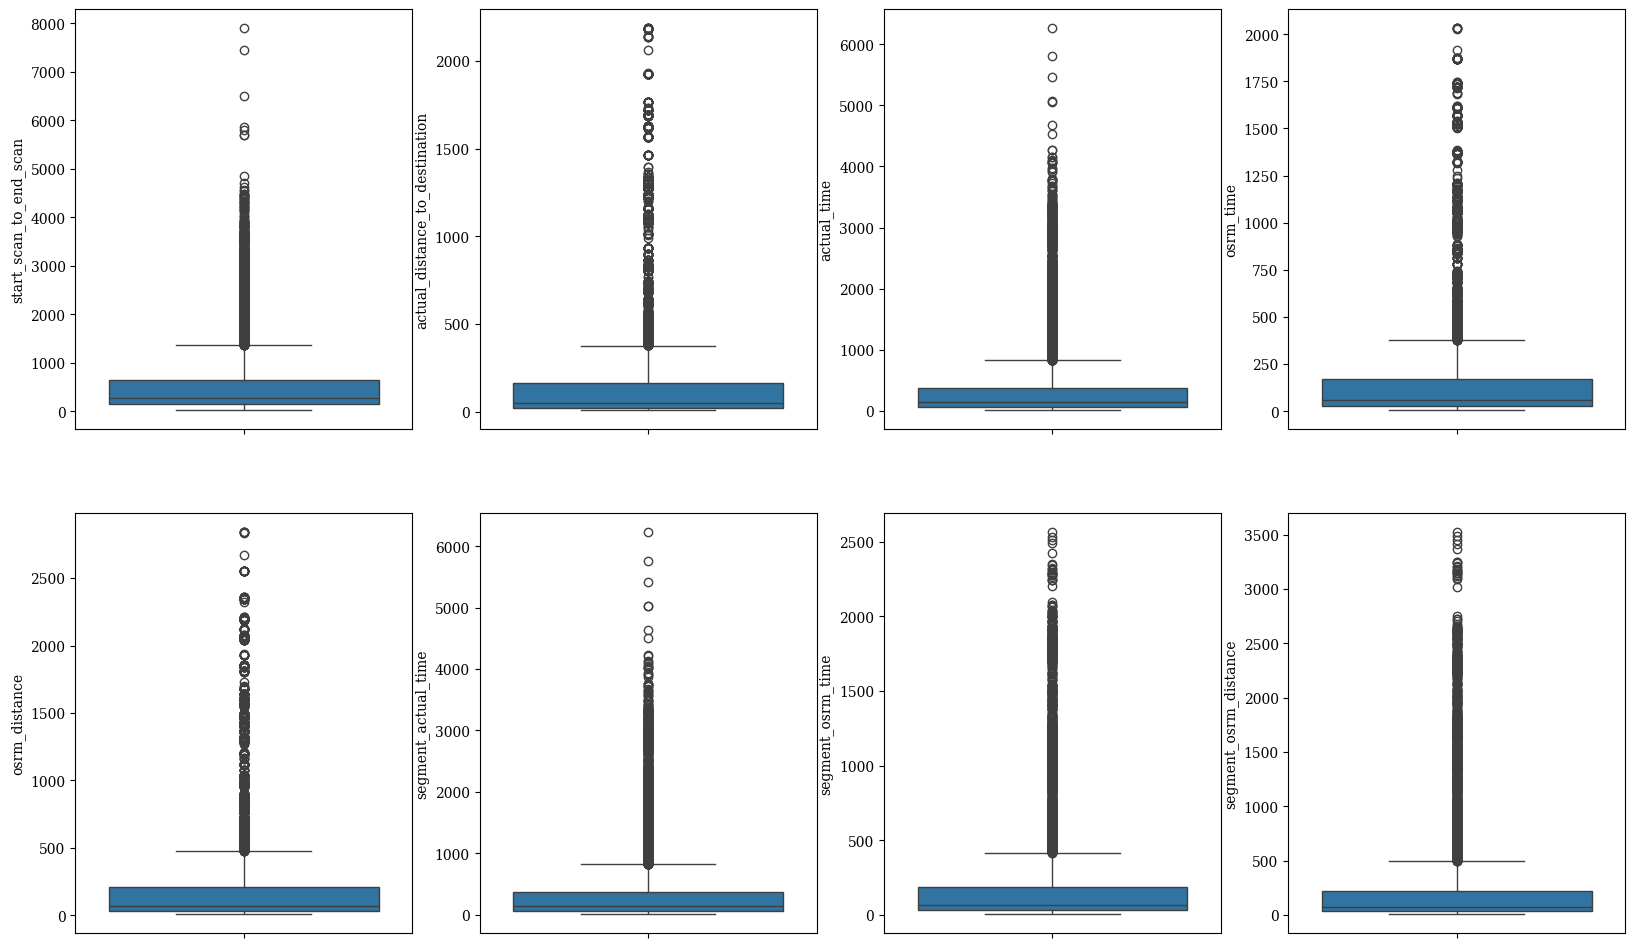

In [ ]:
fig = plt.figure(figsize = (20,12))

numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

plt.title('Outlier detection from numeric fields')

for pos,col in enumerate(numeric_cols):
    plt.subplot(2,4,pos+1)
    sns.boxplot(trip_df[col])

plt.show()

In [ ]:
# Calculating IQR (Inter Quartile Range)
q1 = trip_df[numeric_cols].quantile(0.25)
q3 = trip_df[numeric_cols].quantile(0.75)
iqr = q3-q1
Lower_limit = q1-(1.5*iqr)
Upper_limit = q3+(1.5*iqr)

In [ ]:
# Checking if there is any record lesser than the lower limit.
trip_df[trip_df[numeric_cols] < Lower_limit].count().sum()

0

In [ ]:
# Checking if there is any record higher than the upper limit.
trip_df[trip_df[numeric_cols] > Upper_limit].count()

,0
trip_uuid,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0


In [ ]:
data = {"Q1":q1,"Q3":q3,"IQR":iqr,"Lower_limit":Lower_limit,"Upper_limit":Upper_limit}
observed = pd.DataFrame(data)
observed

,Q1,Q3,IQR,Lower_limit,Upper_limit
start_scan_to_end_scan,149.000000,638.000000,489.000000,-584.500000,1371.500000
actual_distance_to_destination,22.786366,164.705551,141.919184,-190.092410,377.584327
actual_time,67.000000,370.000000,303.000000,-387.500000,824.500000
osrm_time,29.000000,168.250000,139.250000,-179.875000,377.125000
osrm_distance,30.775025,208.632775,177.857750,-236.011600,475.419400
segment_actual_time,66.000000,367.000000,301.000000,-385.500000,818.500000
segment_osrm_time,30.000000,185.000000,155.000000,-202.500000,417.500000
segment_osrm_distance,32.617700,218.917675,186.299975,-246.832263,498.367638


<font color= purple> <b> Note: </b> </font>

*   Instead of removing the outliers, Filling them with the observed lower and upper limits to avoid data loss.

*   Also, maintaining a separate dataframe for numeric columns.

In [ ]:
trip_clip_df = np.clip(trip_df[numeric_cols], Lower_limit, Upper_limit,axis = 1)
trip_clip_df.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,1371.5,377.584327,824.5,377.125,475.4194,818.5,417.5,498.367638
1,180.0,73.186911,143.0,68.000,85.1110,141.0,65.0,84.189400
2,1371.5,377.584327,824.5,377.125,475.4194,818.5,417.5,498.367638
3,100.0,17.175274,59.0,15.000,19.6800,59.0,16.0,19.876600
4,717.0,127.448500,341.0,117.000,146.7918,340.0,115.0,146.791900


# <font color= purple> <font size = -0.25> <b> Exploratory Data Analysis </b> </font>

In [ ]:
trip_clip_df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000
mean,453.774899,109.137813,263.927095,114.980836,138.617593,261.650000,126.318412,147.028338
std,410.443673,117.524760,261.015054,116.504109,147.897388,259.204065,128.852523,155.335994
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,149.000000,22.786366,67.000000,29.000000,30.775025,66.000000,30.000000,32.617700
50%,280.000000,48.463337,149.000000,60.000000,65.591250,147.000000,65.000000,70.113450
75%,638.000000,164.705551,370.000000,168.250000,208.632775,367.000000,185.000000,218.917675
max,1371.500000,377.584327,824.500000,377.125000,475.419400,818.500000,417.500000,498.367638


<ipython-input-456-f9371987c245>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,pos+1)


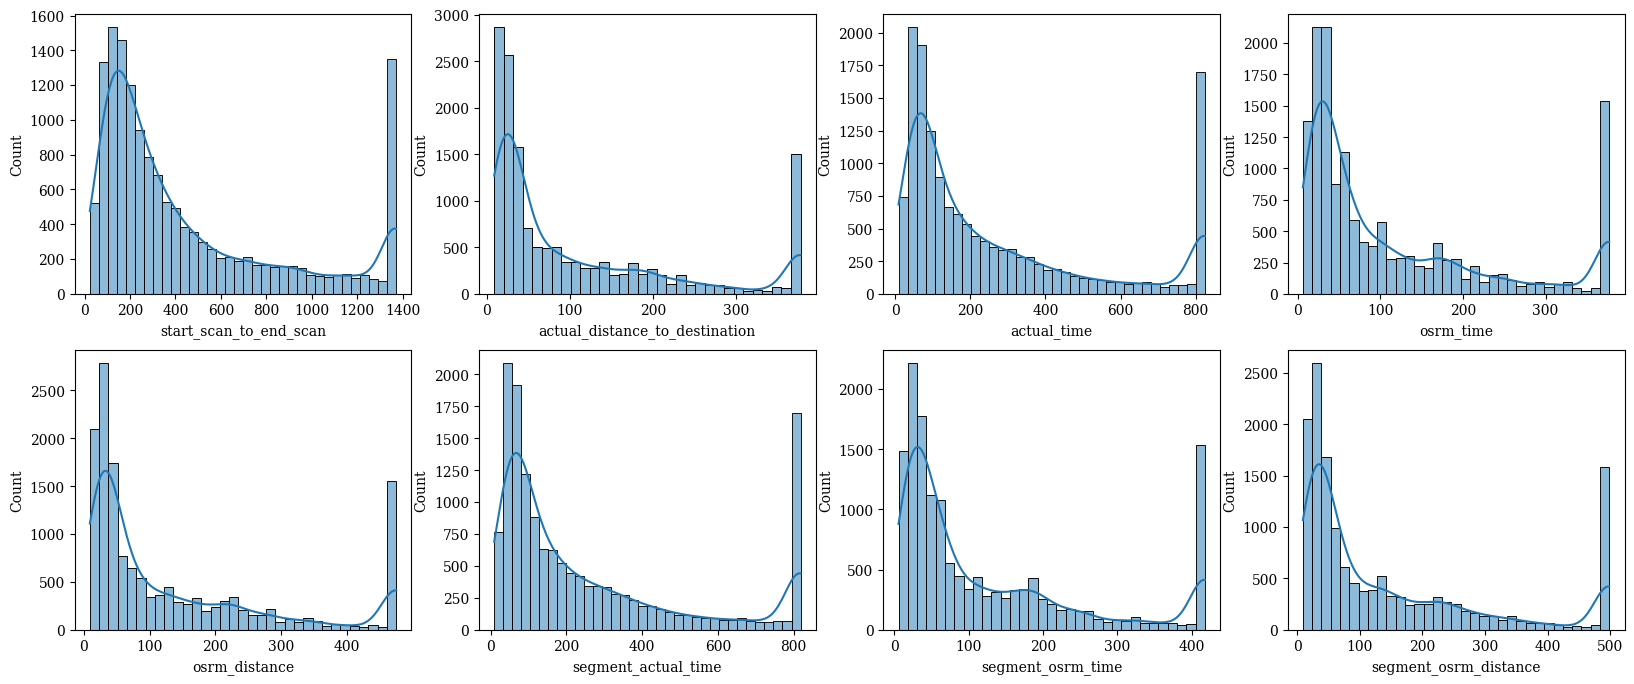

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.title('Distribution of continuous variables')

for pos,col in enumerate(numeric_cols):
    plt.subplot(2,4,pos+1)
    sns.histplot(trip_clip_df[col],kde=True)
plt.show()

# <font size = -0.25> Number of Trips by state (Source & Destination)


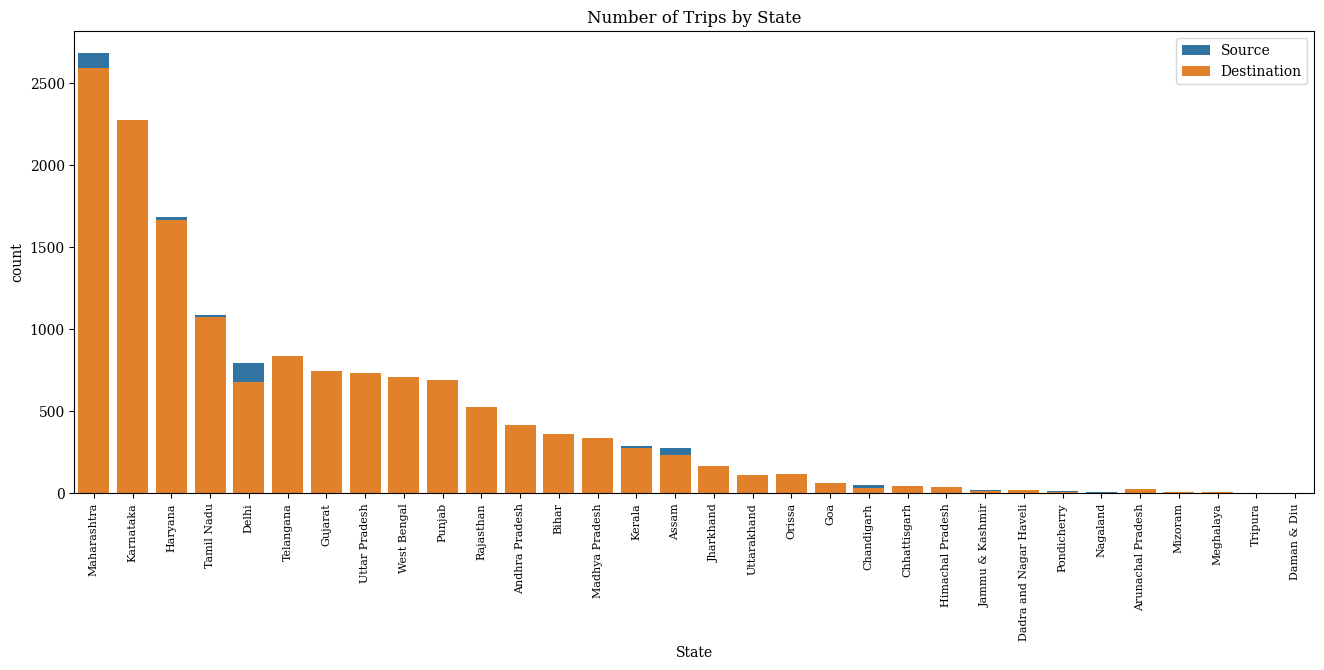

In [ ]:
plt.figure(figsize=(16,6))

source=trip_df.source_state.value_counts().reset_index()
destination=trip_df.destination_state.value_counts().reset_index()

sns.barplot(data=source, x='source_state', y='count', label='Source')
sns.barplot(data=destination, x='destination_state', y='count', label='Destination')
plt.title('Number of Trips by State')
plt.xlabel('State')
plt.xticks(rotation=90, fontsize=8)
plt.show();

<font color= purple> <b>Insights</b> </font>

*   The above chart clearly indicates that the majority of trips are within the state and it's very rare that the trips are between states.
*   Maharastra, Karnataka, Haryana, Tamil Nadu and Delhi are the top 5 states with No.of trips taken.

In [ ]:
!pip install pySankey --quiet

In [ ]:
#Flow of trips between top states

state_colors = {
    "Karnataka": "#0000FF",
    "Maharashtra": "#FF6347",
    "Tamil Nadu": "#800080",
    "Delhi": "#FF00FF",
    "Haryana": "#00FF00",
}

flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state']]

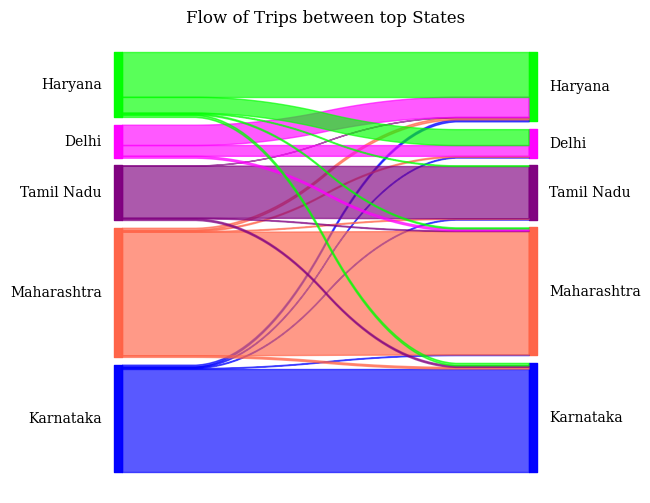

In [ ]:
from pySankey.sankey import sankey

sankey(flow.source_state, flow.destination_state, aspect=20, colorDict=state_colors, fontsize=10)
plt.title('Flow of Trips between top States')
plt.show()

<font color= purple> <b>Insights</b> </font>

*   The sankey chart clearly indicates that the majority of trips are within the state however, the trips between Delhi & Haryana seems often.


In [ ]:
trip_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_city,source_state,source_city,trip_year,trip_month,trip_day,trip_hour,trip_dayofweek,trip_time_mins,trip_time
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,...,Gurgaon,Madhya Pradesh,Bhopal,2018,9,12,0,2,2260.116667,1 days 13:40:07
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,...,Chikblapur,Karnataka,Tumkur,2018,9,12,0,2,181.616667,0 days 03:01:37
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,...,Chandigarh,Karnataka,Bangalore,2018,9,12,0,2,3934.366667,2 days 17:34:22
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,...,Mumbai,Maharashtra,Mumbai,2018,9,12,0,2,100.483333,0 days 01:40:29
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,...,Bellary,Karnataka,Bellary,2018,9,12,0,2,718.350000,0 days 11:58:21


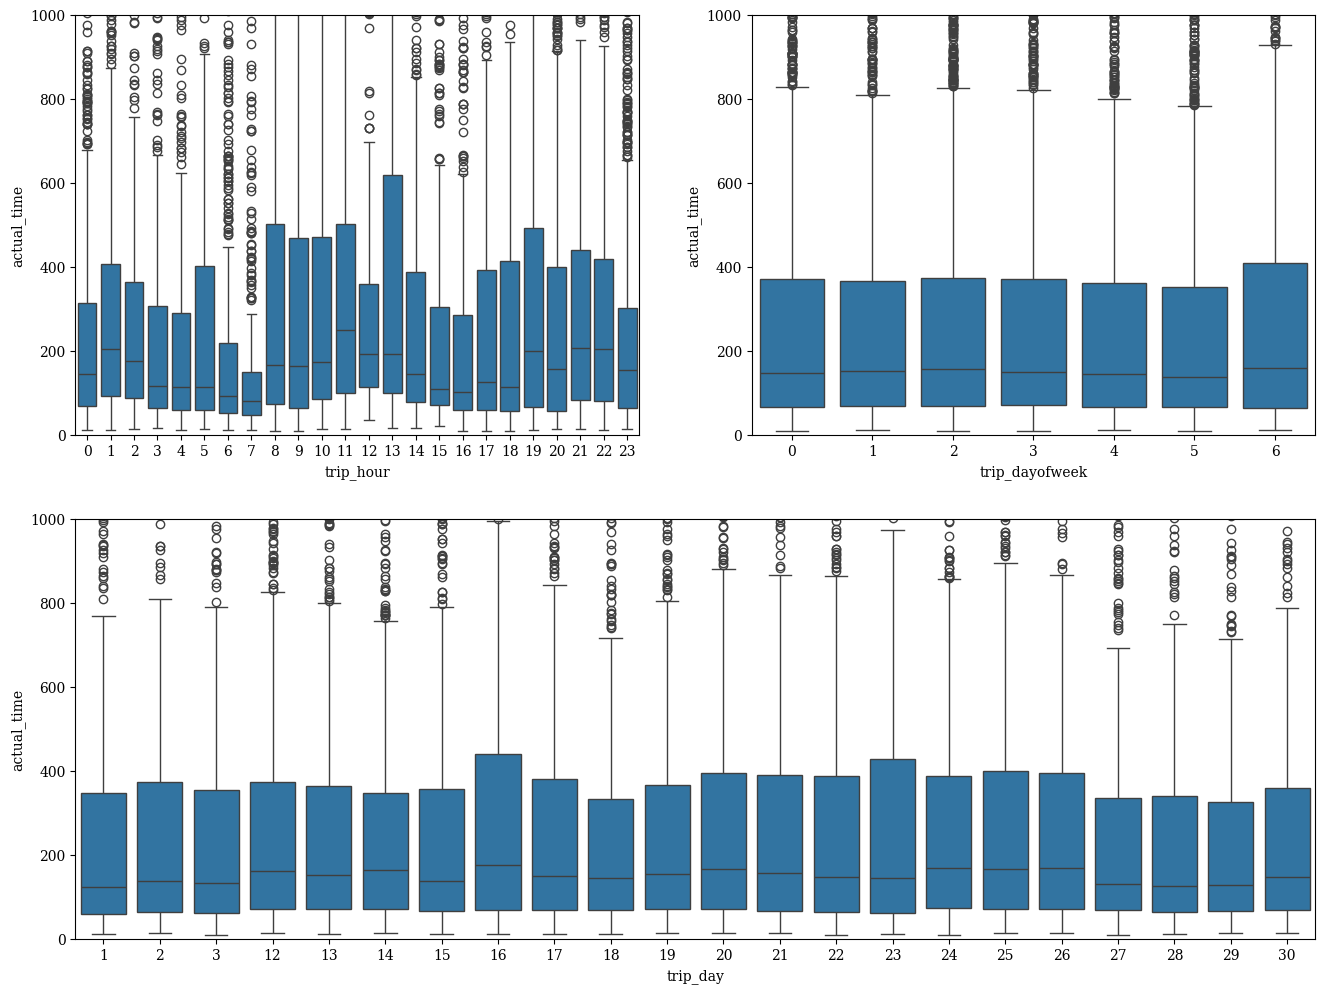

In [ ]:
# Actual trip time by month/weekday/day/hour
fig = plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
sns.boxplot(data=trip_df, x='trip_hour', y='actual_time')
plt.ylim(0,1000)

plt.subplot(2,2,2)
sns.boxplot(data=trip_df, x='trip_dayofweek', y='actual_time')
plt.ylim(0,1000)

plt.subplot(2,1,2)
sns.boxplot(data=trip_df, x='trip_day', y='actual_time')
plt.ylim(0,1000)
plt.show()

<font color= purple> <b>Insights</b> </font>

*   Average trip times are very low between hrs (3AM to 7AM) and (15PM to 18PM) and it's viceversa between hrs (8AM to 14PM) and (19PM to 2AM).
*   Average trips per day is similar through out the week however, there is a small dip in Fridays' and Saturdays'.
*   We can see that the Average trips over the monthends (27th to 30th) are very less compare to rest of the month.

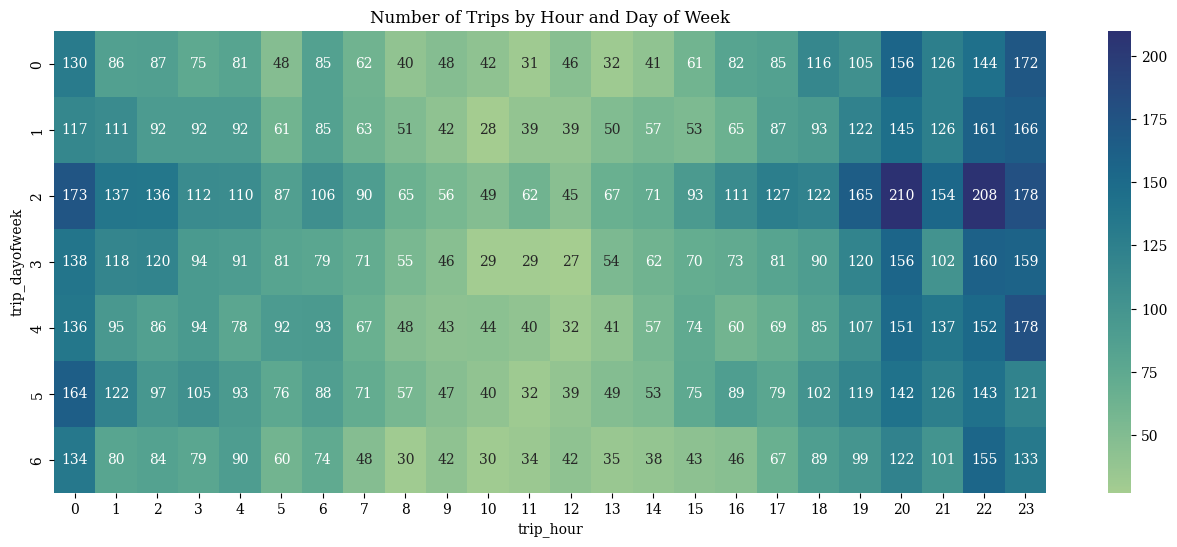

In [ ]:
# Number of Trips by hour and Day of week
data = pd.pivot_table(data=trip_df, index='trip_dayofweek', columns='trip_hour', values='trip_uuid', aggfunc='count')
plt.figure(figsize=(16,6))
sns.heatmap(data, annot=True, cmap="crest",fmt='d')
plt.title('Number of Trips by Hour and Day of Week')

plt.show()

<font color= purple> <b>Insights</b> </font>

*   Wednesday seems busiest day as the no.of trips being higher than the rest of the days.
*   Busiest hrs - 7PM to 1AM were the most no.of trips taken.

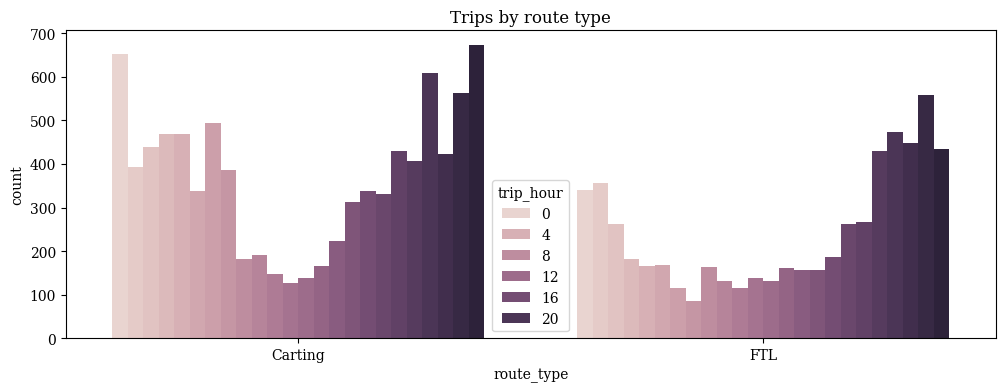

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Trips by route type")
sns.countplot(data=trip_df, x='route_type',hue='trip_hour')
plt.show()

<font color= purple> <b>Insights</b> </font>

*   Busy hrs for the trip type - Carting is between 6PM to 7AM.
*   Busy hrs for the trip type - FTL is between 7PM to 1AM.



In [ ]:
Total_Trips = len(trip_df)
Total_Carting_Trips = len(trip_df[trip_df['route_type'] == 'Carting'])
Total_FTL_Trips = len(trip_df[trip_df['route_type'] == 'FTL'])
Per_Carting_Trips = round((Total_Carting_Trips/Total_Trips)*100)
Per_FTL_Trips = round((Total_FTL_Trips/Total_Trips)*100)
print(f"Total Carting trips: {Total_Carting_Trips} or in percentage {Per_Carting_Trips}%")
print(f"Total FTL trips: {Total_FTL_Trips} or in percentage {Per_FTL_Trips}%")

Total Carting trips: 8906 or in percentage 60%
Total FTL trips: 5894 or in percentage 40%


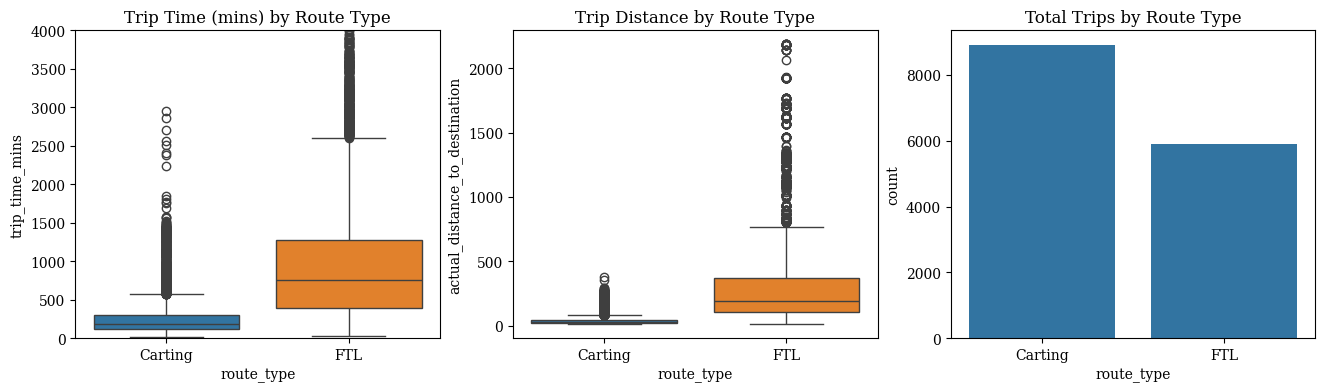

In [ ]:
# Time and Distance by route_type
fig = plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(data=trip_df, x='route_type', y='trip_time_mins', hue = 'route_type')
plt.title('Trip Time (mins) by Route Type')
plt.ylim(0,4000)

plt.subplot(1,3,2)
sns.boxplot(data=trip_df, x='route_type', y='actual_distance_to_destination', hue = 'route_type')
plt.title('Trip Distance by Route Type')

plt.subplot(1,3,3)
sns.countplot(data=trip_df, x='route_type')
plt.title('Total Trips by Route Type')

plt.show()

<font color= purple> <b>Insights</b> </font>

*   We can clearly see that the Carting route type were used for short-distance (0-100km) and short duration (<500 mins) trips whereas the FTLs are used for long-distance (>100km) and long-duration (>500 mins) trips

*   60% of trips are carting type and 40% trips are FTL type.


# <font color= purple> <font size = -0.25> <b> One-Hot Encoding on Categorical Features </b> </font>


In [ ]:
# Applying one-hot encoding on categorical columns
categorical_columns = trip_df.select_dtypes(include=['category']).columns.tolist()
one_hot_encoded_data = pd.get_dummies(trip_df, columns = categorical_columns,dtype=np.uint8)
one_hot_encoded_data.sample(5)

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,source_city,trip_year,trip_month,trip_day,trip_hour,trip_dayofweek,trip_time_mins,trip_time,route_type_Carting,route_type_FTL
12659,trip-153828291941888557,2018-09-30 04:48:39,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,IND421302AAR,Mumbai_East_I_21 (Maharashtra),IND421004AAA,Mumbai_Ulhasngr_DC (Maharashtra),2018-09-30 04:48:39,2018-09-30 06:09:59,81.0,...,Mumbai,2018,9,30,4,6,81.333333,0 days 01:21:20,1,0
4597,trip-153725462695300610,2018-09-18 07:10:26,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-18 07:10:26,2018-09-18 13:49:21,398.0,...,Bhiwandi,2018,9,18,7,1,398.916667,0 days 06:38:55,0,1
2848,trip-153704530519726859,2018-09-15 21:01:45,thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcdd...,IND444602AAA,Amravati_DC (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-16 03:22:43,2018-09-16 22:52:56,1170.0,...,Amravati,2018,9,15,21,5,1170.216667,0 days 19:30:13,0,1
12473,trip-153826063977298204,2018-09-29 22:37:19,thanos::sroute:edfd7934-08ee-458c-9e1f-55411c0...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND285205AAB,Konch_Central_D_2 (Uttar Pradesh),2018-09-29 22:37:19,2018-09-30 04:54:53,375.0,...,Kanpur,2018,9,29,22,5,377.566667,0 days 06:17:34,0,1
6608,trip-153749870862322739,2018-09-21 02:58:28,thanos::sroute:20bdcd7d-50ae-485a-a38f-95f3335...,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND500050AAA,Patancheru_Ameenpur_I (Telangana),2018-09-21 02:58:28,2018-09-21 06:27:40,209.0,...,Hyderabad,2018,9,21,2,4,209.200000,0 days 03:29:12,1,0


In [ ]:
one_hot_encoded_data.shape

(14800, 30)

# <font color= purple> <font size = -0.25> <b> Normalize/ Standardize the numerical features using StandardScaler. </b> </font>

In [ ]:
from sklearn.preprocessing import StandardScaler

trip = trip_df.copy()
scaler = StandardScaler()
scaler.fit(trip[numeric_cols])
trip[numeric_cols] = scaler.transform(trip[numeric_cols])
trip[numeric_cols].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2.623713,2.160648,2.145243,2.046199,2.123421,2.145792,2.627782,2.632098
1,-0.532809,-0.299138,-0.381574,-0.344319,-0.322100,-0.382853,-0.368793,-0.333835
2,5.165328,5.769657,5.323797,5.814305,5.800749,5.308844,5.592580,5.570467
3,-0.654272,-0.482462,-0.531153,-0.539538,-0.498668,-0.530223,-0.524500,-0.488126
4,0.282512,-0.121541,-0.028995,-0.163833,-0.155653,-0.025213,-0.209907,-0.183647


# <font color= purple> <font size = -0.25> <b> Hypothesis Testing Analysis </b> </font>

# <font size = -0.25> Actual time Vs OSRM time

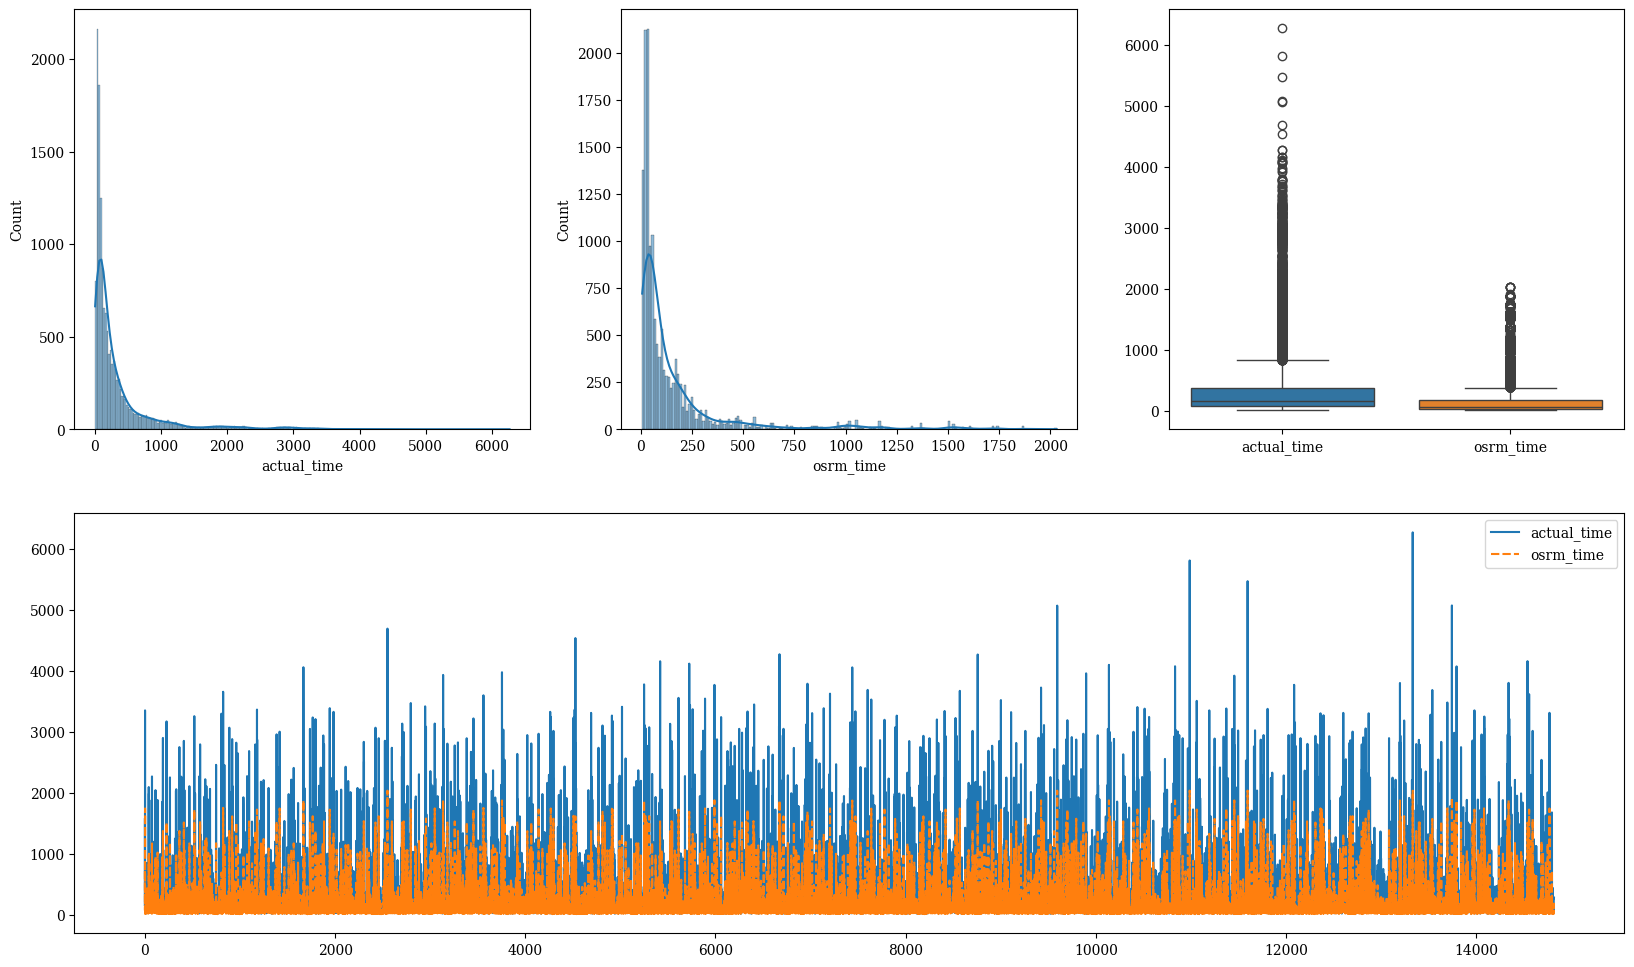

In [ ]:
# Distribution of actual Vs osrm time
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(trip_df['actual_time'],kde=True)

plt.subplot(2,3,2)
sns.histplot(trip_df['osrm_time'],kde=True)

plt.subplot(2,3,3)
sns.boxplot(data=trip_df[['actual_time','osrm_time']])

plt.subplot(2,1,2)
sns.lineplot(data=trip_df[['actual_time','osrm_time']])

plt.show()

<font color= purple> <b>Insights</b> </font>

* The histograms show that both actual_time and osrm_time is right skewed and not normally distributed
* We can clearly see from the box plot and the lineplot that the actual time is much higher than the OSRM time

In [ ]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of OSRM Time', trip_df.osrm_time.var())

Variance of Actual Time: 315389.0487516094
Variance of OSRM Time 73711.39153864945


<font color= purple> <b>Note:</b> </font>

*   As the data is skewed (non-normal) distributions, we can perform Levene's test.


In [ ]:
from scipy.stats import levene

# H0 : Variances between actual and osrm times are same
# Ha : Variances between actual and osrm times are not same

s_stat, p_value = levene(trip_df['actual_time'], trip_df['osrm_time'])

# Print the results
print(f"Test-statistic = {s_stat}")
print(f"P-value = {p_value}")

alpha = 0.05
# Make a decision and conclusion
if p_value < alpha:
    decision = "Reject the null hypothesis - Variances between actual and osrm times are not same."
else:
    decision = "Fail to reject the null hypothesis - Variances between actual and osrm times are same."

print(decision)

Test-statistic = 1020.4994891914528
P-value = 3.470800813899771e-220
Reject the null hypothesis - Variances between actual and osrm times are not same.


# <font size = -0.25> Actual time Vs Segment actual time

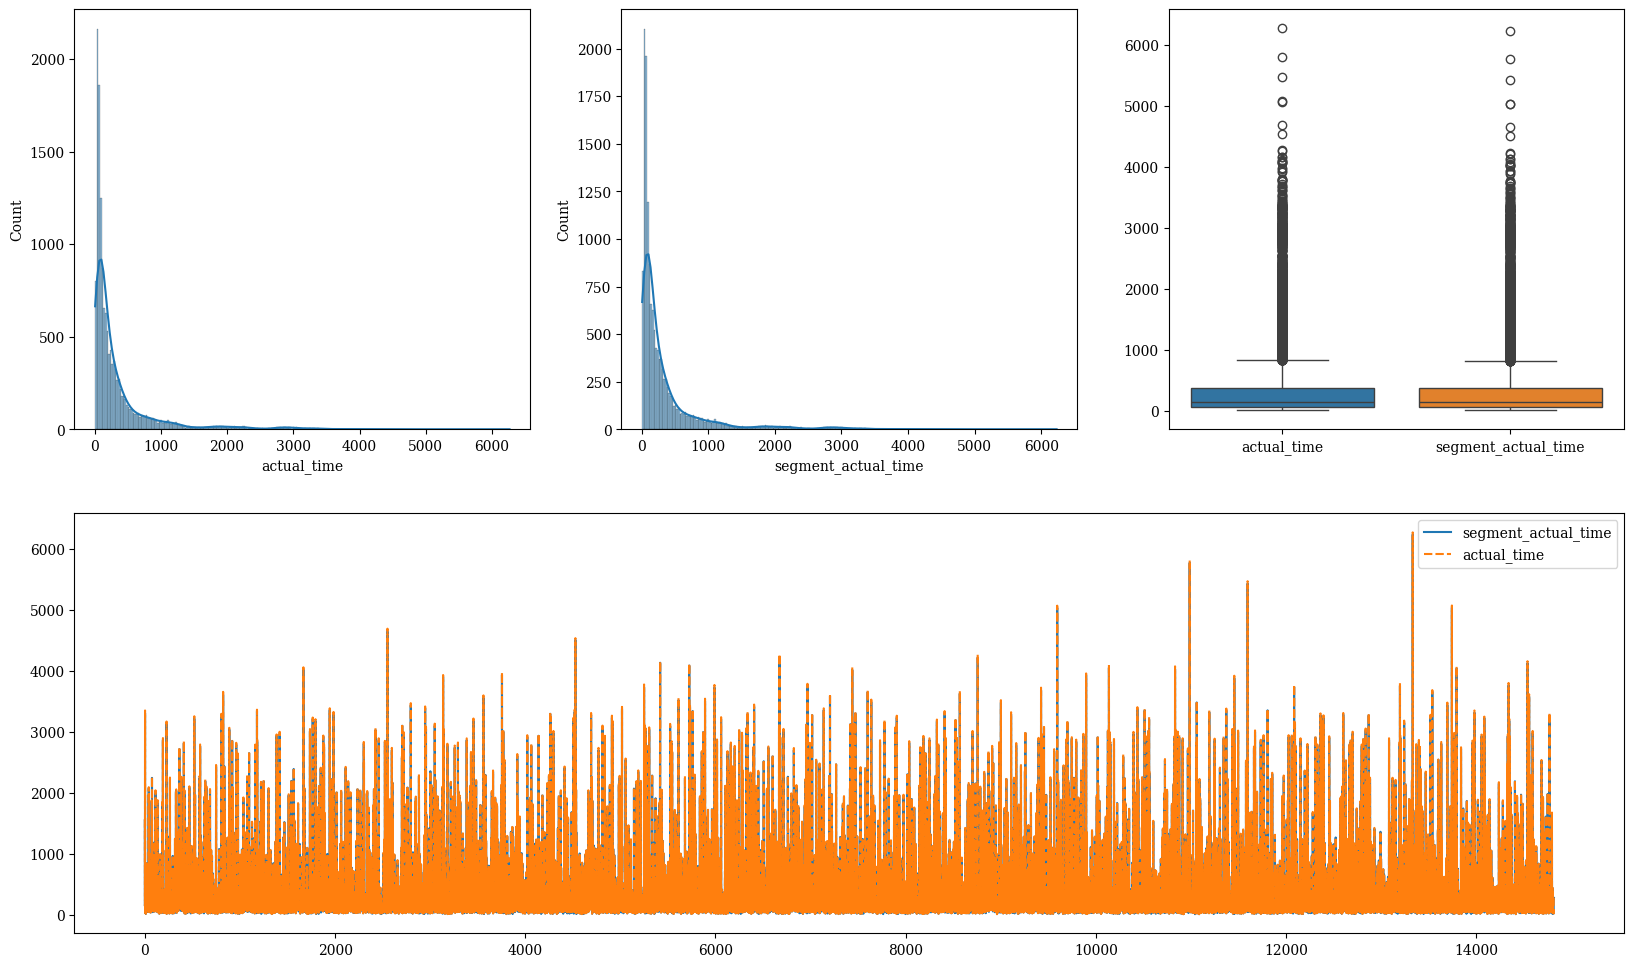

In [ ]:
# Distribution of actual Vs segment_actual times
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(trip_df['actual_time'],kde=True)

plt.subplot(2,3,2)
sns.histplot(trip_df['segment_actual_time'],kde=True)

plt.subplot(2,3,3)
sns.boxplot(data=trip_df[['actual_time','segment_actual_time']])

plt.subplot(2,1,2)
sns.lineplot(data=trip_df[['segment_actual_time','actual_time']])

plt.show()

<font color= purple> <b>Insights</b> </font>

* The histograms show that both actual_time and segment_actual_time is right skewed and not normally distributed
* We can clearly see from the box plot and the lineplot that the actual time and segment_actual_time are almost similar.

In [ ]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of Segment Actual Time', trip_df.segment_actual_time.var())

Variance of Actual Time: 315389.0487516094
Variance of Segment Actual Time 309629.173297027


<font color= purple> <b>Note:</b> </font>

*   As the data is skewed (non-normal) distributions, we can perform Levene's test.


In [ ]:
from scipy.stats import levene

# H0 : Variances between actual and segment_actual times are same
# Ha : Variances between actual and segment_actual times are not same

s_stat, p_value = levene(trip_df['actual_time'], trip_df['segment_actual_time'])

# Print the results
print(f"Test-statistic = {s_stat}")
print(f"P-value = {p_value}")

alpha = 0.05
# Make a decision and conclusion
if p_value < alpha:
    decision = "Reject the null hypothesis - Variances between actual and segment_actual times are not same."
else:
    decision = "Fail to reject the null hypothesis - Variances between actual and segment_actual times are same."

print(decision)

Test-statistic = 0.1532525521100671
P-value = 0.6954490990469593
Fail to reject the null hypothesis - Variances between actual and segment_actual times are same.


# <font size = -0.25> OSRM Distance & Segment OSRM Distance

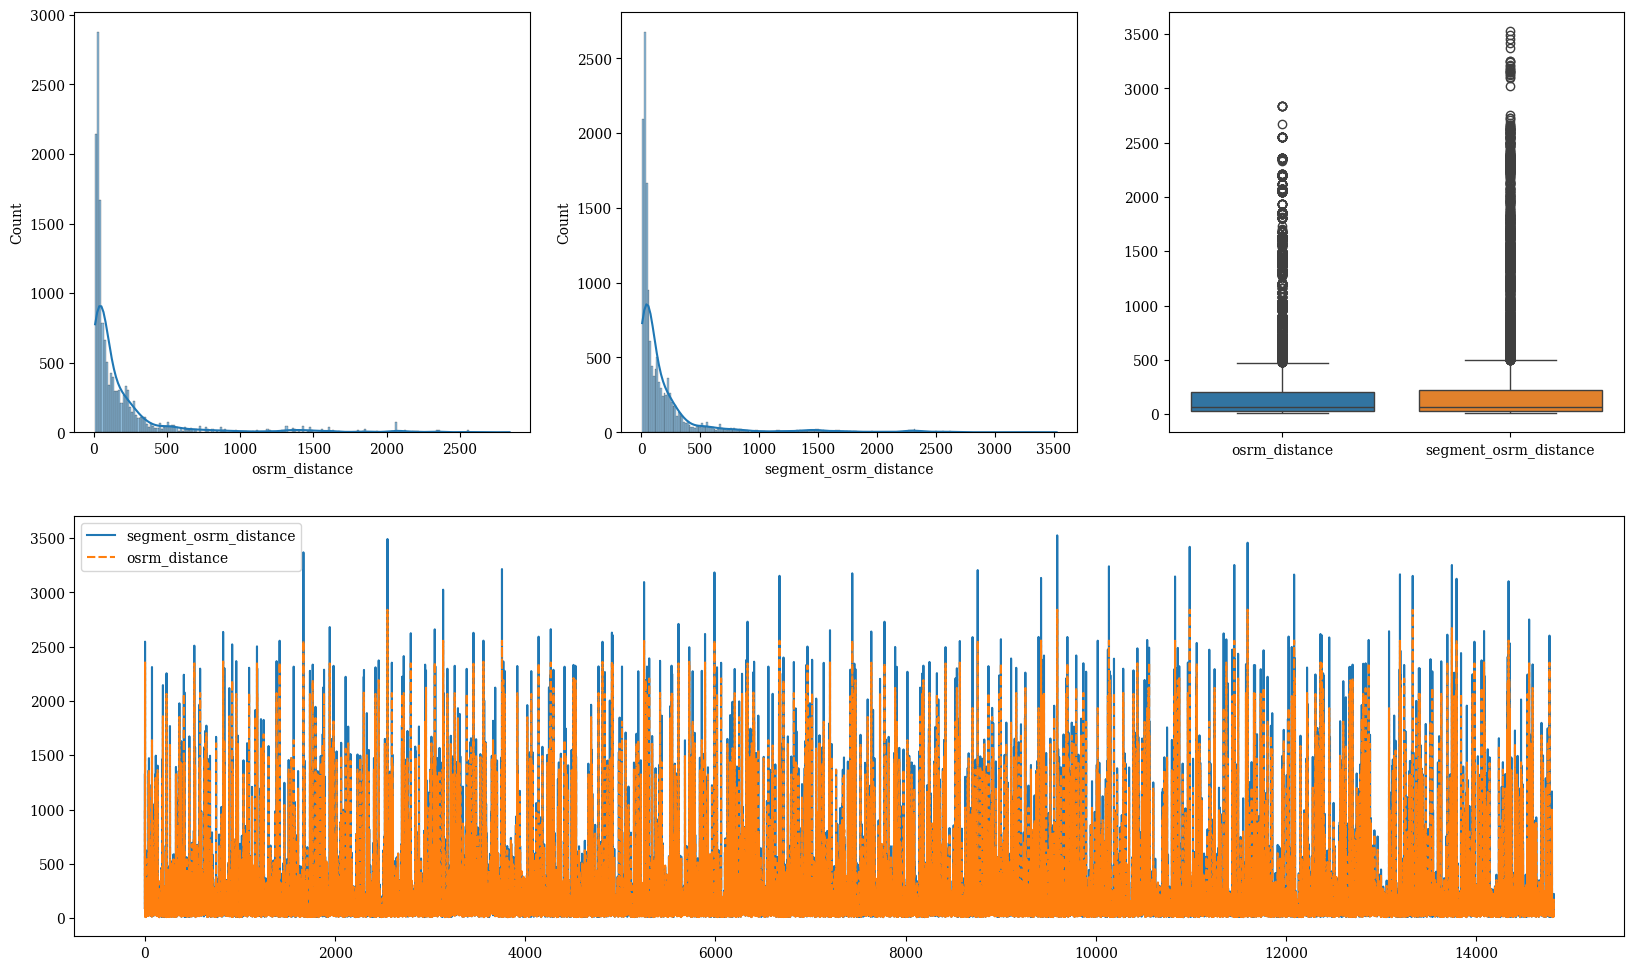

In [ ]:
# Distribution of OSRM Distance Vs Segment OSRM Distance
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(trip_df['osrm_distance'],kde=True)

plt.subplot(2,3,2)
sns.histplot(trip_df['segment_osrm_distance'],kde=True)

plt.subplot(2,3,3)
sns.boxplot(data=trip_df[['osrm_distance','segment_osrm_distance']])

plt.subplot(2,1,2)
sns.lineplot(data=trip_df[['segment_osrm_distance','osrm_distance']])

plt.show()

<font color= purple> <b>Insights</b> </font>

* The histograms show that both osrm_distance and segment_osrm_distance is right skewed and not normally distributed
* We are unable to determine from the boxplot whether the osrm distance and segment_osrm_distance are same or not however, we can see slight differences in lineplot.

In [ ]:
print('Variance of Actual Time:',trip_df.osrm_distance.var())
print('Variance of Segment Actual Time', trip_df.segment_osrm_distance.var())

Variance of Actual Time: 137332.75055889005
Variance of Segment Actual Time 173757.32610667954


<font color= purple> <b>Note:</b> </font>

*   As the data is skewed (non-normal) distributions, we can perform Levene's test.

In [ ]:
from scipy.stats import levene

# H0 : Variances between osrm and segment_osrm distance are same
# Ha : Variances between osrm and segment_osrm distance are not same

s_stat, p_value = levene(trip_df['osrm_distance'], trip_df['segment_osrm_distance'])

# Print the results
print(f"Test-statistic = {s_stat}")
print(f"P-value = {p_value}")

alpha = 0.05
# Make a decision and conclusion
if p_value < alpha:
    decision = "Reject the null hypothesis - Variances between osrm and segment_osrm distance are not same."
else:
    decision = "Fail to reject the null hypothesis - Variances between osrm and segment_osrm distance are same."

print(decision)

Test-statistic = 13.73612434776314
P-value = 0.0002107523278057755
Reject the null hypothesis - Variances between osrm and segment_osrm distance are not same.


# <font size = -0.25> OSRM time Vs OSRM segment time

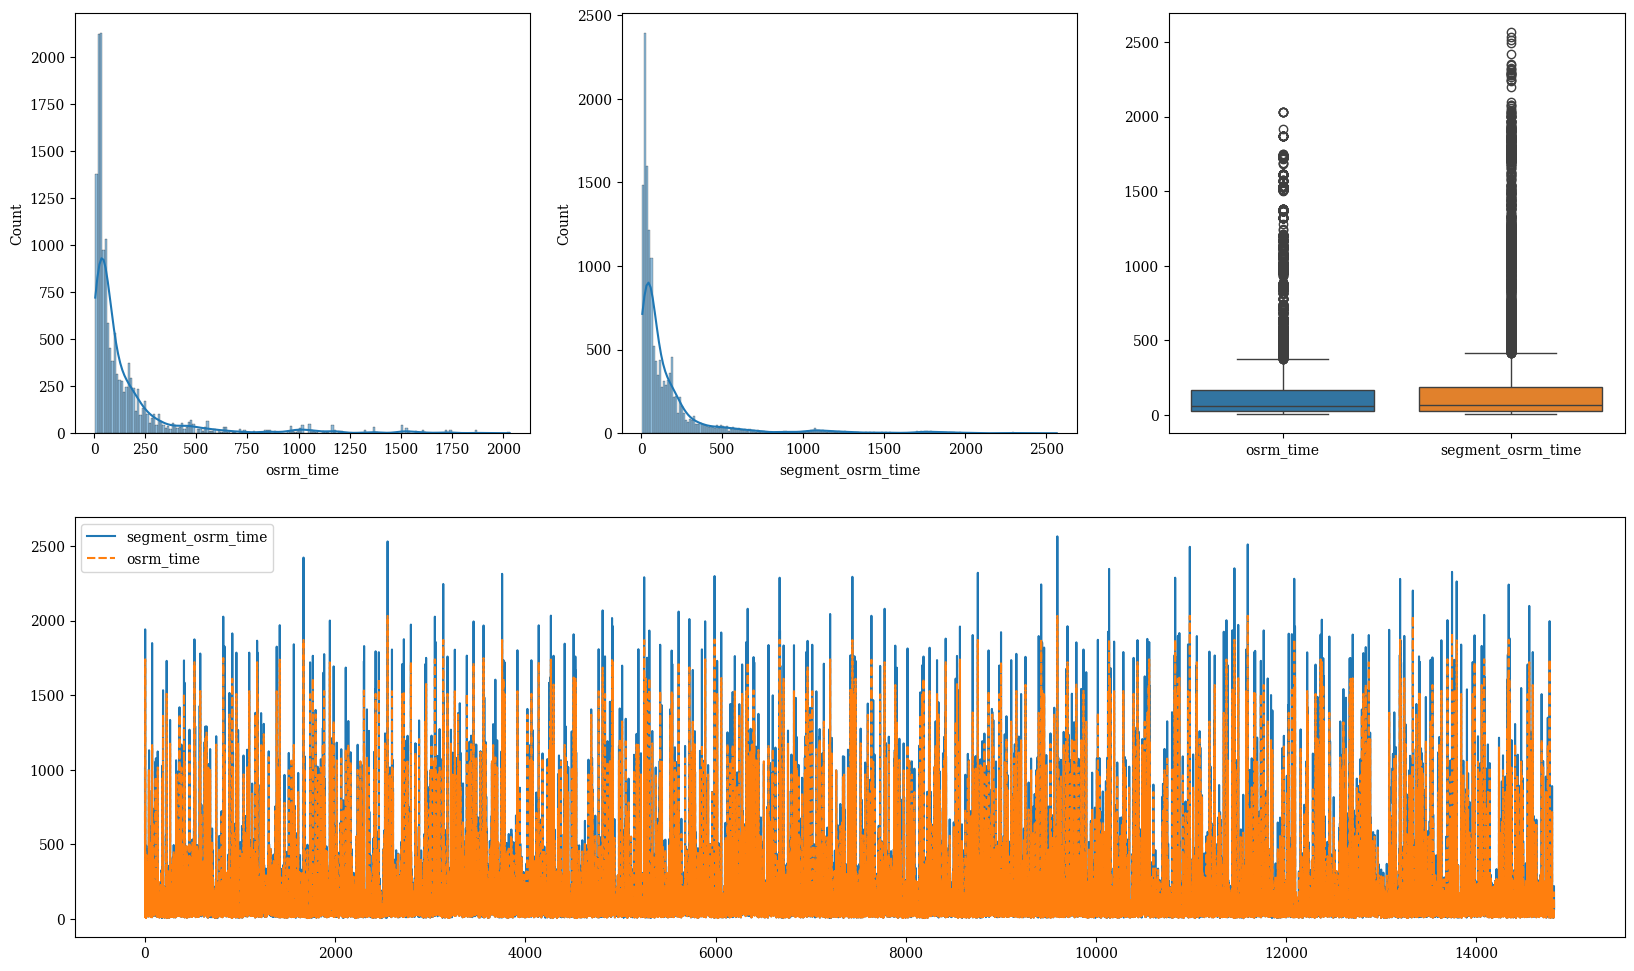

In [ ]:
# Distribution of OSRM time Vs Segment OSRM time
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(trip_df['osrm_time'],kde=True)

plt.subplot(2,3,2)
sns.histplot(trip_df['segment_osrm_time'],kde=True)

plt.subplot(2,3,3)
sns.boxplot(data=trip_df[['osrm_time','segment_osrm_time']])

plt.subplot(2,1,2)
sns.lineplot(data=trip_df[['segment_osrm_time','osrm_time']])

plt.show()

<font color= purple> <b>Insights</b> </font>

* The histograms show that both osrm_time and segment_osrm_time is right skewed and not normally distributed
* We are unable to determine from the boxplot whether the osrm time and segment_osrm_time are same or not however, we can see slight differences in lineplot.

In [ ]:
print('Variance of Actual Time:',trip_df.osrm_time.var())
print('Variance of Segment Actual Time', trip_df.segment_osrm_time.var())

Variance of Actual Time: 73711.39153864945
Variance of Segment Actual Time 99038.13555751118


<font color= purple> <b>Note:</b> </font>

*   As the data is skewed (non-normal) distributions, we can perform Levene's test.

In [ ]:
from scipy.stats import levene

# H0 : Variances between osrm and segment_osrm times are same
# Ha : Variances between osrm and segment_osrm times are not same

s_stat, p_value = levene(trip_df['osrm_time'], trip_df['segment_osrm_time'])

# Print the results
print(f"Test-statistic = {s_stat}")
print(f"P-value = {p_value}")

alpha = 0.05
# Make a decision and conclusion
if p_value < alpha:
    decision = "Reject the null hypothesis - Variances between osrm and segment_osrm times are not same."
else:
    decision = "Fail to reject the null hypothesis - Variances between osrm and segment_osrm times are same."

print(decision)

Test-statistic = 28.71807595806989
P-value = 8.434382972244705e-08
Reject the null hypothesis - Variances between osrm and segment_osrm times are not same.


# <font color= purple> <font size = -0.25> <b> Recommendations </b> </font>

*  Increase the deliveries over weekends as they're currently less utilized.
*  Since actual time is higher than OSRM time on an average for all trips, the company needs to either improve their forecasting accuracy or identify root cause of delays in deliveries.
*  Identify best practices from Maharashtra and Karnataka (states which have the highest volume of deliveries) to increase business in other states.
*  To reduce actual time, dispatch as many deliveries as possible outside of the busy hours.
* Optimise routes along corridors with maximum average speed to shorten delivery time.